# Homework 05 - Neural Networks
## 自己编程实现两层或多层全连接神经网络，可以使用`moons` 、`circles`、或者`digits`数据集来测试、验证算法。
dataset_moons:
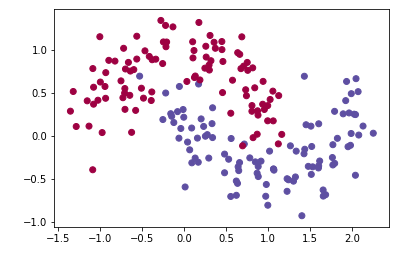



dataset_circles:
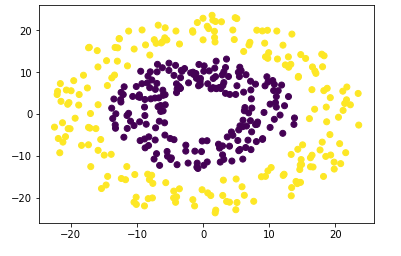

dataset_digits:
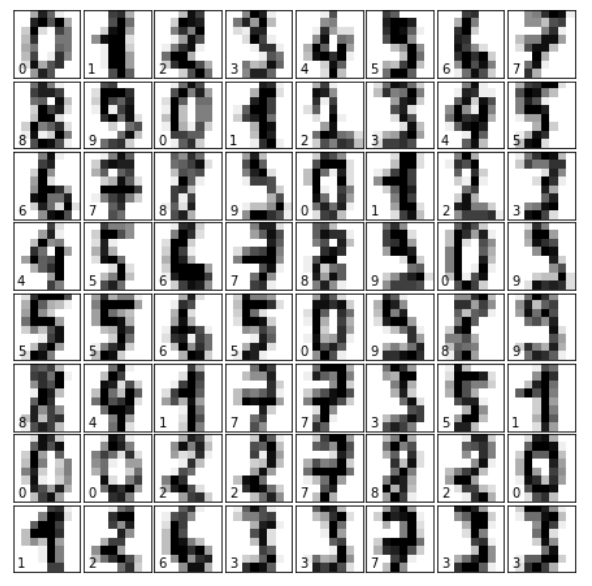

dataset_moons加载数据的方式是：

````
# moon dataset
% matplotlib inline
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# generate sample data
np.random.seed(0)
X, y = datasets.make_moons(200, noise=0.20)

# plot data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()
````
dataset_circles的数据文件是dataset_circles.csv

dataset_digits的加载方式：
````
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits

# load data
digits = load_digits()

# copied from notebook 02_sklearn_data.ipynb
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary)
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))
````
要求：  
1.先用函数的方式实现网络的正向计算和反向误差传播，权值更新。  
2.构思并实现基于类的神经网络程序。  
3.构建多分类的网络（可以使用dataset_digits）  
4.学习softmax和cross entropy的方法，并实现类别所属概率的输出。  
5.对比自己实现与sklearn的方法的精度。  
6.如何将分类错误的样本可视化出来？  

### 1. 用函数的方式实现网络的正向计算和反向误差传播，权值更新

#### 1) 导入需用库

In [2]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

#### 2) 生成数据

In [3]:
# 生成数据
np.random.seed(0)
x, y = datasets.make_moons(200, noise=0.20)
y_true = np.array(y).astype(float)

# 生成输出目标
t = np.zeros((x.shape[0], 2))
t[np.where(y==0), 0] = 1
t[np.where(y==1), 1] = 1

#### 3) 原始数据可视化

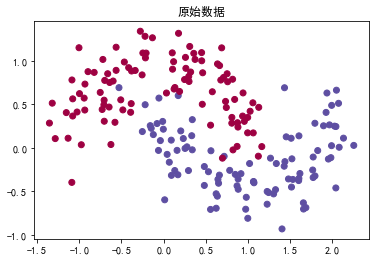

In [4]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 原始数据可视化
def origin_show():
    plt.figure()
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.title('原始数据')
    plt.show()
    
origin_show()

#### 4) 训练预设

In [5]:
n_input_dim = x.shape[1] #输入个数
n_output_dim = 2 #输出个数
n_hide_dim = 4 #层数

#初始化权重数组
def initial():
    w1 = np.random.randn(n_input_dim, n_hide_dim)/np.sqrt(n_input_dim)
    b1 = np.zeros((1, n_hide_dim))
    w2 = np.random.randn(n_hide_dim, n_output_dim)/np.sqrt(n_hide_dim)
    b2 = np.zeros((1,n_output_dim))
    return w1, b1, w2, b2

#### 5) sigmod函数及其导数

In [6]:
def sigmod(z):
    return 1.0/(1+np.exp(-z))

def sigmod_derivitive(z):
    f = sigmod(z)
    return f*(1-f)

#### 6) 正向计算

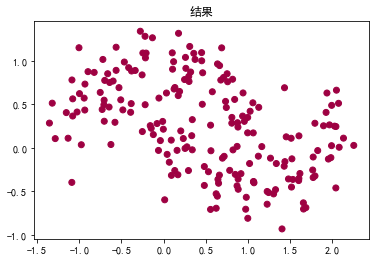

In [7]:
def forward(x, w1, b1, w2, b2):
    z1 = sigmod(x.dot(w1) + b1)
    z2 = sigmod(z1.dot(w2) + b2)
    return z1,z2

#正向计算可视化
def forward_show(x,y_predict):
    plt.figure()
    plt.scatter(x[:, 0], x[:, 1], c=y_predict, cmap=plt.cm.Spectral)
    plt.title('结果')
    plt.show()

w1, b1, w2, b2 = initial()
z1,z2 = forward(x, w1, b1, w2, b2)
y_predict = np.argmax(z2, axis=1)
forward_show(x,y_predict)


**仅正向计算，没有反向误差传播，无法得到想要得结果。**

#### 7) 反向误差传播

第   1次迭代, L=98.4941,正确率 = 50.00 %
第   2次迭代, L=94.8221,正确率 = 50.00 %
第   3次迭代, L=92.1175,正确率 = 79.50 %
第   4次迭代, L=90.0174,正确率 = 78.00 %
第   5次迭代, L=88.2673,正确率 = 79.50 %
第   6次迭代, L=86.7107,正确率 = 79.00 %
第   7次迭代, L=85.2587,正确率 = 79.50 %
第   8次迭代, L=83.8630,正确率 = 80.00 %
第   9次迭代, L=82.4991,正确率 = 80.00 %
第  10次迭代, L=81.1551,正确率 = 80.00 %
第  11次迭代, L=79.8265,正确率 = 79.50 %
第  12次迭代, L=78.5128,正确率 = 79.50 %
第  13次迭代, L=77.2152,正确率 = 79.50 %
第  14次迭代, L=75.9361,正确率 = 81.50 %
第  15次迭代, L=74.6784,正确率 = 82.00 %
第  16次迭代, L=73.4449,正确率 = 82.00 %
第  17次迭代, L=72.2386,正确率 = 81.50 %
第  18次迭代, L=71.0620,正确率 = 80.50 %
第  19次迭代, L=69.9174,正确率 = 81.00 %
第  20次迭代, L=68.8065,正确率 = 81.00 %
第  21次迭代, L=67.7310,正确率 = 81.00 %
第  22次迭代, L=66.6919,正确率 = 81.00 %
第  23次迭代, L=65.6899,正确率 = 81.00 %
第  24次迭代, L=64.7254,正确率 = 81.00 %
第  25次迭代, L=63.7985,正确率 = 81.00 %
第  26次迭代, L=62.9088,正确率 = 81.00 %
第  27次迭代, L=62.0558,正确率 = 81.00 %
第  28次迭代, L=61.2388,正确率 = 81.00 %
第  29次迭代, L=60.4570,正确率 = 81.00 %
第  30次迭代, L=59

第 308次迭代, L=38.8302,正确率 = 84.50 %
第 309次迭代, L=38.8281,正确率 = 84.50 %
第 310次迭代, L=38.8261,正确率 = 84.50 %
第 311次迭代, L=38.8241,正确率 = 84.50 %
第 312次迭代, L=38.8221,正确率 = 84.50 %
第 313次迭代, L=38.8201,正确率 = 84.50 %
第 314次迭代, L=38.8182,正确率 = 84.50 %
第 315次迭代, L=38.8163,正确率 = 84.50 %
第 316次迭代, L=38.8144,正确率 = 84.50 %
第 317次迭代, L=38.8125,正确率 = 84.50 %
第 318次迭代, L=38.8106,正确率 = 84.50 %
第 319次迭代, L=38.8088,正确率 = 84.50 %
第 320次迭代, L=38.8070,正确率 = 84.50 %
第 321次迭代, L=38.8052,正确率 = 84.50 %
第 322次迭代, L=38.8034,正确率 = 84.50 %
第 323次迭代, L=38.8017,正确率 = 84.50 %
第 324次迭代, L=38.7999,正确率 = 84.50 %
第 325次迭代, L=38.7982,正确率 = 84.50 %
第 326次迭代, L=38.7965,正确率 = 84.50 %
第 327次迭代, L=38.7948,正确率 = 84.50 %
第 328次迭代, L=38.7932,正确率 = 84.50 %
第 329次迭代, L=38.7915,正确率 = 84.50 %
第 330次迭代, L=38.7899,正确率 = 84.50 %
第 331次迭代, L=38.7883,正确率 = 84.50 %
第 332次迭代, L=38.7867,正确率 = 84.50 %
第 333次迭代, L=38.7851,正确率 = 84.50 %
第 334次迭代, L=38.7835,正确率 = 84.50 %
第 335次迭代, L=38.7820,正确率 = 84.50 %
第 336次迭代, L=38.7805,正确率 = 84.50 %
第 337次迭代, L=38

第 626次迭代, L=38.6012,正确率 = 85.00 %
第 627次迭代, L=38.6009,正确率 = 85.00 %
第 628次迭代, L=38.6006,正确率 = 85.00 %
第 629次迭代, L=38.6003,正确率 = 85.00 %
第 630次迭代, L=38.6000,正确率 = 85.00 %
第 631次迭代, L=38.5997,正确率 = 85.00 %
第 632次迭代, L=38.5994,正确率 = 85.00 %
第 633次迭代, L=38.5991,正确率 = 85.00 %
第 634次迭代, L=38.5989,正确率 = 85.00 %
第 635次迭代, L=38.5986,正确率 = 85.00 %
第 636次迭代, L=38.5983,正确率 = 85.00 %
第 637次迭代, L=38.5980,正确率 = 85.00 %
第 638次迭代, L=38.5977,正确率 = 85.00 %
第 639次迭代, L=38.5974,正确率 = 85.00 %
第 640次迭代, L=38.5972,正确率 = 85.00 %
第 641次迭代, L=38.5969,正确率 = 85.00 %
第 642次迭代, L=38.5966,正确率 = 85.00 %
第 643次迭代, L=38.5963,正确率 = 85.00 %
第 644次迭代, L=38.5960,正确率 = 85.00 %
第 645次迭代, L=38.5958,正确率 = 85.00 %
第 646次迭代, L=38.5955,正确率 = 85.00 %
第 647次迭代, L=38.5952,正确率 = 85.00 %
第 648次迭代, L=38.5949,正确率 = 85.00 %
第 649次迭代, L=38.5946,正确率 = 85.00 %
第 650次迭代, L=38.5944,正确率 = 85.00 %
第 651次迭代, L=38.5941,正确率 = 85.00 %
第 652次迭代, L=38.5938,正确率 = 85.00 %
第 653次迭代, L=38.5935,正确率 = 85.00 %
第 654次迭代, L=38.5933,正确率 = 85.00 %
第 655次迭代, L=38

第 938次迭代, L=38.5313,正确率 = 85.00 %
第 939次迭代, L=38.5312,正确率 = 85.00 %
第 940次迭代, L=38.5310,正确率 = 85.00 %
第 941次迭代, L=38.5308,正确率 = 85.00 %
第 942次迭代, L=38.5306,正确率 = 85.00 %
第 943次迭代, L=38.5304,正确率 = 85.00 %
第 944次迭代, L=38.5303,正确率 = 85.00 %
第 945次迭代, L=38.5301,正确率 = 85.00 %
第 946次迭代, L=38.5299,正确率 = 85.00 %
第 947次迭代, L=38.5297,正确率 = 85.00 %
第 948次迭代, L=38.5295,正确率 = 85.00 %
第 949次迭代, L=38.5294,正确率 = 85.00 %
第 950次迭代, L=38.5292,正确率 = 85.00 %
第 951次迭代, L=38.5290,正确率 = 85.00 %
第 952次迭代, L=38.5288,正确率 = 85.00 %
第 953次迭代, L=38.5286,正确率 = 85.00 %
第 954次迭代, L=38.5285,正确率 = 85.00 %
第 955次迭代, L=38.5283,正确率 = 85.00 %
第 956次迭代, L=38.5281,正确率 = 85.00 %
第 957次迭代, L=38.5279,正确率 = 85.00 %
第 958次迭代, L=38.5278,正确率 = 85.00 %
第 959次迭代, L=38.5276,正确率 = 85.00 %
第 960次迭代, L=38.5274,正确率 = 85.00 %
第 961次迭代, L=38.5272,正确率 = 85.00 %
第 962次迭代, L=38.5271,正确率 = 85.00 %
第 963次迭代, L=38.5269,正确率 = 85.00 %
第 964次迭代, L=38.5267,正确率 = 85.00 %
第 965次迭代, L=38.5265,正确率 = 85.00 %
第 966次迭代, L=38.5263,正确率 = 85.00 %
第 967次迭代, L=38

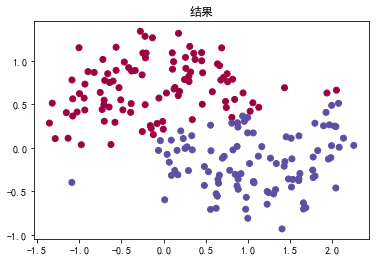

In [11]:
alpha = 0.01 #学习速率
n = 1000 #迭代次数

def backpropagation(x,y):
    accc = []
    w1, b1, w2, b2 = initial()
    z1,z2 = forward(x, w1, b1, w2, b2)
    for i in range(n):
        z1,z2 = forward(x, w1, b1, w2, b2)
        L = np.sum((z2 - y)**2)
        y_predict = np.argmax(z2, axis=1)
        acc = accuracy_score(y_true, y_predict)*100
        accc.append(acc)
        print("第%4d次迭代, L=%.4f,正确率 = %.2f" % (i+1,L,acc),"%")
        d2 = z2*(1-z2)*(y - z2)
        d1 = z1*(1-z1)*(np.dot(d2, w2.T))
        #更新w1, b1, w2, b2
        w2 += alpha * np.dot(z1.T, d2)
        b2 += alpha * np.sum(d2, axis=0)
        w1 += alpha * np.dot(x.T, d1)
        b1 += alpha * np.sum(d1, axis=0)
    return x, y_predict,accc
    
x, y_predict, accc = backpropagation(x, t)
forward_show(x,y_predict)

**反向误差传播，可以得到近似于原始数据得分类结果，正确率为85%。**  
从第404次迭代开始，正确率就达到85%，后续一直维持在85%，未发生变化。  
因此，迭代次数可以仅为500次。

#### 8) 正确率可视化

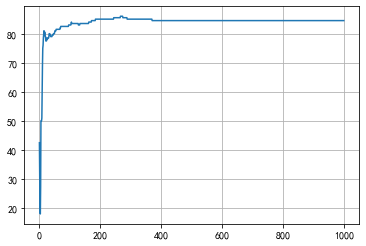

In [10]:
def accc_show(accc):
    plt.figure()
    times = np.array(range(n))+1
    plt.plot(times,accc)
    plt.grid(True)
    plt.show()
accc_show(accc)

### 2. 基于类的神经网络程序

#### 1) 导入需用库

In [12]:
import numpy as np
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

#### 2) 生成数据

In [13]:
# 生成数据
np.random.seed(0)
X, y = datasets.make_moons(200, noise=0.20)
y_true = np.array(y).astype(float)

# 生成输出目标
t = np.zeros((X.shape[0], 2))
t[np.where(y==0), 0] = 1
t[np.where(y==1), 1] = 1

#### 3) sigmoid函数

In [14]:
def sigmod(z):
    return 1.0/(1+np.exp(-z))

#### 4) 封装为类NN_model

In [15]:
class NN_model:
    def __init__(self,nodes=None):
        self.alpha = 0.01 #学习速率
        self.n = 1000 #迭代次数 
        if not nodes:
            self.nodes = [2, 6, 2]          # default nodes size (from input -> output)
        else:
            self.nodes = nodes

    #初始化权重函数
    def init_weight(self):
        W = []
        B = []
        n_layer = len(self.nodes)
        for i in range(n_layer-1):
            w = np.random.randn(self.nodes[i], self.nodes[i+1]) / np.sqrt(self.nodes[i])
            b = np.random.randn(1, self.nodes[i+1])
            W.append(w)
            B.append(b)    
        self.W = W
        self.B = B
    
    #正向计算函数
    def forward(self, X):
        Z = []
        x0 = X
        for i in range(len(self.nodes)-1):
            z = sigmod(np.dot(x0, self.W[i]) + self.B[i])
            x0 = z
            Z.append(z)
        
        self.Z = Z
        return Z[-1]
    
    #反向误差传播函数
    def backpropagation(self, X, y, n=None, alpha=None):
        if not n: n = self.n
        if not alpha: alpha = self.alpha
        self.X = X
        self.Y = y
        for i in range(n):
            # 正向计算
            self.forward(X)
            self.evaluate() 
            # 更新权重值
            W = self.W
            B = self.B
            Z = self.Z

            D = []
            d0 = y
            n_layer = len(self.nodes)
            for j in range(n_layer-1, 0, -1):
                jj = j - 1
                z = self.Z[jj]
                if j == n_layer - 1:
                    d = z*(1-z)*(d0 - z)
                else:
                    d = z*(1-z)*np.dot(d0, W[j].T)    
                d0 = d
                D.insert(0, d)
            # 更新权重列表
            for j in range(n_layer-1, 0, -1):
                jj = j - 1
                if jj != 0:
                    W[jj] += alpha * np.dot(Z[jj-1].T, D[jj])
                else:
                    W[jj] += alpha * np.dot(X.T, D[jj])   
                B[jj] += alpha * np.sum(D[jj], axis=0)

    #计算正确率
    def evaluate(self):
        z = self.Z[-1]
        L = np.sum((z - self.Y)**2)   
        y_pred = np.argmax(z, axis=1)
        y_true = np.argmax(self.Y, axis=1)
        acc = accuracy_score(y_true, y_pred)*100
        #输出正确率
        print("L=%.4f,正确率 = %.2f" % (L, acc),"%")

#### 5) 创建对象并计算

In [16]:
nn = NN_model([2, 6, 4, 2])
nn.init_weight()
nn.backpropagation(X, t, 1000)

#预测
y_res  = nn.forward(X)
y_pred = np.argmax(y_res, axis=1)

L=121.6211,正确率 = 50.00 %
L=115.9284,正确率 = 50.00 %
L=111.3050,正确率 = 50.00 %
L=107.7892,正确率 = 50.00 %
L=105.2653,正确率 = 50.00 %
L=103.5336,正确率 = 50.00 %
L=102.3805,正确率 = 50.00 %
L=101.6226,正确率 = 50.00 %
L=101.1217,正确率 = 50.00 %
L=100.7828,正确率 = 51.00 %
L=100.5438,正确率 = 53.00 %
L=100.3654,正确率 = 54.00 %
L=100.2235,正确率 = 52.00 %
L=100.1034,正确率 = 47.50 %
L=99.9961,正确率 = 46.00 %
L=99.8962,正确率 = 46.50 %
L=99.8004,正确率 = 46.50 %
L=99.7067,正确率 = 49.50 %
L=99.6139,正确率 = 51.50 %
L=99.5210,正确率 = 56.00 %
L=99.4276,正确率 = 58.50 %
L=99.3332,正确率 = 63.00 %
L=99.2375,正确率 = 66.00 %
L=99.1404,正确率 = 69.00 %
L=99.0416,正确率 = 70.50 %
L=98.9408,正确率 = 71.00 %
L=98.8380,正确率 = 72.00 %
L=98.7329,正确率 = 74.00 %
L=98.6254,正确率 = 74.50 %
L=98.5152,正确率 = 75.50 %
L=98.4021,正确率 = 78.50 %
L=98.2861,正确率 = 79.00 %
L=98.1669,正确率 = 80.00 %
L=98.0443,正确率 = 80.00 %
L=97.9180,正确率 = 80.50 %
L=97.7879,正确率 = 81.50 %
L=97.6538,正确率 = 83.00 %
L=97.5155,正确率 = 83.00 %
L=97.3726,正确率 = 83.00 %
L=97.2251,正确率 = 83.00 %
L=97.0725,正确率 = 83.00 %
L=

L=33.1546,正确率 = 89.50 %
L=33.1155,正确率 = 89.50 %
L=33.0762,正确率 = 89.50 %
L=33.0367,正确率 = 89.50 %
L=32.9970,正确率 = 89.50 %
L=32.9572,正确率 = 89.50 %
L=32.9172,正确率 = 89.50 %
L=32.8770,正确率 = 89.50 %
L=32.8367,正确率 = 89.50 %
L=32.7962,正确率 = 89.50 %
L=32.7556,正确率 = 89.50 %
L=32.7147,正确率 = 89.50 %
L=32.6737,正确率 = 89.50 %
L=32.6326,正确率 = 89.50 %
L=32.5913,正确率 = 89.50 %
L=32.5498,正确率 = 89.50 %
L=32.5082,正确率 = 89.50 %
L=32.4664,正确率 = 89.50 %
L=32.4244,正确率 = 89.50 %
L=32.3823,正确率 = 89.50 %
L=32.3400,正确率 = 89.50 %
L=32.2976,正确率 = 89.50 %
L=32.2550,正确率 = 89.50 %
L=32.2122,正确率 = 90.00 %
L=32.1693,正确率 = 90.00 %
L=32.1262,正确率 = 90.00 %
L=32.0830,正确率 = 90.00 %
L=32.0396,正确率 = 90.00 %
L=31.9960,正确率 = 90.00 %
L=31.9524,正确率 = 90.00 %
L=31.9085,正确率 = 90.00 %
L=31.8645,正确率 = 90.00 %
L=31.8204,正确率 = 90.00 %
L=31.7761,正确率 = 90.00 %
L=31.7316,正确率 = 90.00 %
L=31.6870,正确率 = 90.00 %
L=31.6422,正确率 = 90.00 %
L=31.5973,正确率 = 90.00 %
L=31.5523,正确率 = 90.00 %
L=31.5071,正确率 = 90.00 %
L=31.4618,正确率 = 90.00 %
L=31.4163,正确率 = 

迭代过程中，正确率偶尔稍有波动，但总体呈现上升趋势（合乎常理）。  
迭代1000次后，正确率达到95.50%。

#### 6) 结果可视化

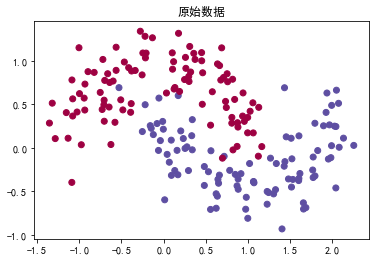

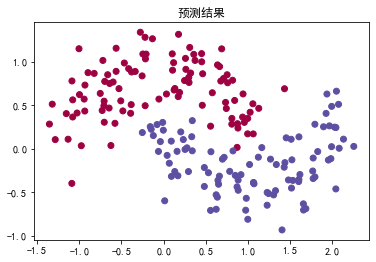

In [17]:
#显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#原始数据可视化
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title("原始数据")
plt.show()

#预测结果
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Spectral)
plt.title("预测结果")
plt.show()


### 3. 错误分类结果的可视化
在函数实现的代码的基础上，编写错误可视化程序。  
编写错误分类结果显示函数error_show(x,y_predict)，其他部分没有改动。  
错误分类的点用红色显示。  
最后绘制出三张图，方便比较。

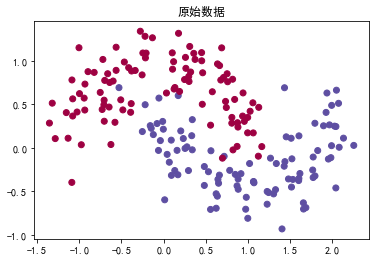

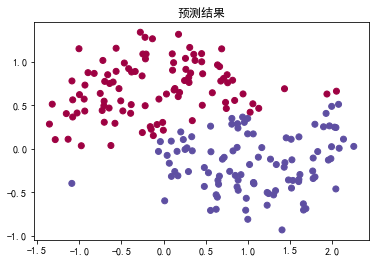

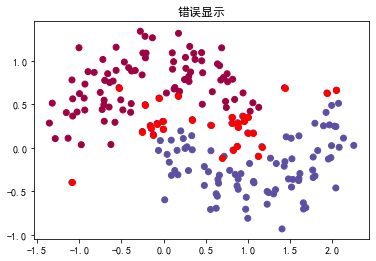

In [4]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 生成数据
np.random.seed(0)
x, y = datasets.make_moons(200, noise=0.20)
y_true = np.array(y).astype(float)

# 生成输出目标
t = np.zeros((x.shape[0], 2))
t[np.where(y==0), 0] = 1
t[np.where(y==1), 1] = 1

# 原始数据可视化
def origin_show():
    plt.figure()
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.title('原始数据')
    plt.show()

alpha = 0.01 #学习速率
n = 1000 #迭代次数
n_input_dim = x.shape[1] #输入个数
n_output_dim = 2 #输出个数
n_hide_dim = 4 #隐藏层数

#初始化权重数组
def initial():
    w1 = np.random.randn(n_input_dim, n_hide_dim)/np.sqrt(n_input_dim)
    b1 = np.zeros((1, n_hide_dim))
    w2 = np.random.randn(n_hide_dim, n_output_dim)/np.sqrt(n_hide_dim)
    b2 = np.zeros((1,n_output_dim))
    return w1, b1, w2, b2

#sigmod函数及其导数
def sigmod(z):
    return 1.0/(1+np.exp(-z))

#正向计算
def forward(x, w1, b1, w2, b2):
    z1 = sigmod(x.dot(w1) + b1)
    z2 = sigmod(z1.dot(w2) + b2)
    return z1,z2

def forward_show(x,y_predict):
    plt.figure()
    plt.scatter(x[:, 0], x[:, 1], c=y_predict, cmap=plt.cm.Spectral)
    plt.title('预测结果')
    plt.show()

#错误预测可视化
def error_show(x,y_predict):
    plt.figure()
    plt.title('错误显示')
    error = []
    for i in range(np.shape(x)[0]):
        if y_predict[i] != y[i]:
            error.append(x[i])
    plt.scatter(x[:, 0], x[:, 1], c=y_predict, cmap=plt.cm.Spectral)
    error = np.array(error)
    plt.scatter(error[:,0],error[:,1],c='r')
    #print(error)
    plt.show()

w1, b1, w2, b2 = initial()
z1,z2 = forward(x, w1, b1, w2, b2)
y_predict = np.argmax(z2, axis=1)

#反向误差传播
def backpropagation(x,y):
    accc = []
    w1, b1, w2, b2 = initial()
    z1,z2 = forward(x, w1, b1, w2, b2)
    for i in range(n):
        z1,z2 = forward(x, w1, b1, w2, b2)
        L = np.sum((z2 - y)**2)
        y_predict = np.argmax(z2, axis=1)
        acc = accuracy_score(y_true, y_predict)*100
        accc.append(acc)
        #print("第%4d次迭代, L=%.4f,正确率 = %.2f" % (i+1,L,acc),"%")
        d2 = z2*(1-z2)*(y - z2)
        d1 = z1*(1-z1)*(np.dot(d2, w2.T))
        #更新w1, b1, w2, b2
        w2 += alpha * np.dot(z1.T, d2)
        b2 += alpha * np.sum(d2, axis=0)
        w1 += alpha * np.dot(x.T, d1)
        b1 += alpha * np.sum(d1, axis=0)
    return x, y_predict,accc
   
x, y_predict, accc = backpropagation(x, t)
origin_show() #显示原始数据
forward_show(x,y_predict) #显示分类结果
error_show(x,y_predict) #错误分类可视化

### 4. DBSCAN聚类

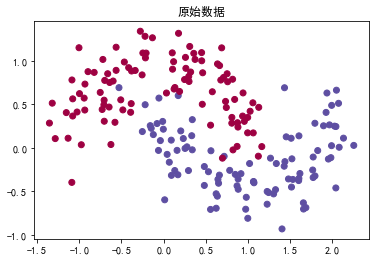

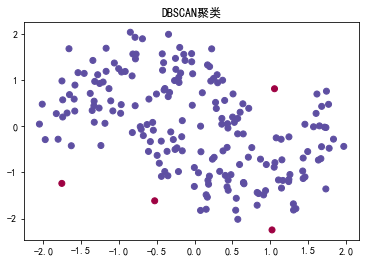

In [8]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 生成数据
np.random.seed(0)
x, y = datasets.make_moons(200, noise=0.20)
y_true = np.array(y).astype(float)

# 原始数据可视化
def origin_show():
    plt.figure()
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.title('原始数据')
    plt.show()
    
origin_show()

#DBSCAN
x = StandardScaler().fit_transform(x)
db = DBSCAN().fit(x)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

#可视化
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap=plt.cm.Spectral)
plt.title("DBSCAN聚类")
plt.show()

因为生成的数据noise值比较大，使用DBSCAN无法实现预期聚类结果。  
若减小noise值，两组数据的距离比较大，从视觉上也可直接观察出是两类数据。此时再使用DBSCAN聚类，则可以得到理想的结果。